# **스테이지 6. 하이퍼파라미터 튜닝 & 최종 모델링**

In [ ]:
# drive에 연결합니다.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 현재 데이터가 있는 공간으로 작업 경로를 변경해줍니다.
%cd "/content/drive/MyDrive/ML_Data/Dacon/데이크루6기/신용카드/open"

Mounted at /content/drive
/content/drive/MyDrive/ML_Data/Dacon/데이크루6기/신용카드/open


## **Intro**

어느덧 이번 프로젝트의 마지막 스테이지입니다!<br>
데이터 확인부터 시작한 모든 작업들의 결실을 맺는 스테이지에요!<br>
마지막까지 학습을 진행하면서 좋은 결실을 맺기를 바랄게요🔥🔥

스테이지 5에서는 더 좋은 예측 결과를 만들기 위해 <font color=blue>**Feature Engineering**</font>을 진행해주었습니다.<br>
이번 스테이지에서는 여러 모델들을 비교하고 <font color=red>**하이퍼파라미터 튜닝**</font>으로 최적의 모델을 찾아보겠습니다!

이번에 저희가 다뤄볼 모델은 아래의 4가지입니다!<br>

* 의사결정나무 (Decision Tree)

* 랜덤포레스트 (Random Forest)

* XGBoost

* LightGBM

4개의 모델 중 어떤 모델이 우수한 성능을 보일까요?<br>
다음 단계들을 밟으며 함께 확인해봅시다!🚀

## **앙상블 모델 (Ensemble Model)**

이번에 저희가 학습할 모델 중 의사결정나무를 제외한 나머지 세 개의 모델은 모두 **앙상블 모델**입니다.

앙상블 기법은 여러 개의 기본 모델을 결합하여 <font color=red>**더 강력하고 정확한 모델**</font>을 만드는 머신러닝 기법입니다.<br>
앙상블은 단일 모델보다 더 좋은 예측 성능을 얻을 수 있고, 과적합을 줄이며 안정적인 결과를 얻을 수 있는 장점이 있습니다!

앙상블 기법은 여러 가지가 있습니다.<br>
그 중 주로 사용하는 앙상블 기법의 종류에는 **보팅(Voting) / 배깅(Bagging) / 부스팅(Boosting)** 3가지가 있습니다.<br>
그럼 하나씩 살펴볼까요?🧐<br>

### **보팅(Voting)**
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbnoYi8%2FbtrHowxaUjI%2FKfqn6jrFrUaUzc2NjN1HV1%2Fimg.png">

🎈 **보팅(Voting)**은 그 단어에서 알 수 있듯이, 서로 다른 알고리즘을 가진 분류기 중 투표를 통하여<br>
최종 예측 결과를 결정하는 방식입니다.<br>
여러 다른 알고리즘의 예측을 평균하거나 다수결 원칙에 따라 최종 예측을 결정합니다.<br>

보팅은 기본 모델로 여러 개의 알고리즘을 사용할 수 있습니다!<br>
사용되는 대표적인 알고리즘으로는 의사결정나무, KNN(K-Nearest Neighbors), 선형회귀, SVM 등이 있습니다.

보팅은 최종 결과 선정 방식에 따라 **하드 보팅(Hard Voting)**, **소프트 보팅(Soft voting)**의 두 가지로 나눌 수 있습니다.

* 하드 보팅: 예측 결과를 다수결로 결정합니다.

* 소프트 보팅: 예측 확률을 평균하여 최종 예측을 결정합니다.

### **배깅(Bagging, Bootstrap aggregating)**
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcQO96B%2FbtrIaO4bLKl%2FpzQEFh7WOfpzZKhKrutZD0%2Fimg.png">

🎈 **배깅(Bagging)**은 bootstrap aggregating 의 줄임말로 부트스트랩(bootstrap) 모델을<br>
여러 번 독립적으로 학습시켜 각 모델의 예측을 평균하여 최종 예측을 만드는 방식입니다.<br>

이 때 부트스트랩(bootstrap) 모델란 원시 데이터(raw)로 부터 복원 임의 추출한 크기가<br>
동일한 여러 개의 표본 자료를 말합니다!<br>
보팅과는 다르게 모두 같은 알고리즘 모델을 사용합니다.<br>

대표적으로 **랜덤포레스트(Random Forest)** 알고리즘이 있습니다!

### **부스팅(Boosting)**
<img src="https://miro.medium.com/v2/resize:fit:850/1*DwvwMlOcT1T9hZwIJvMfng.png">

🎈 **부스팅(Boosting)**은 가중치를 활용하여 약한 분류기를 강한 분류기로 만드는 방법입니다.<br>

배깅은 여러 개의 모델이 서로 **독립적으로** 결과를 예측한 후, 그 결과 값을 집계해<br>
최종적으로 결과 값을 예측하는 방식인 것에 비해,<br>
처음 모델이 예측을 하면 그 예측 결과에 따라 데이터에 가중치를 부여하고, 부여된 가중치로 다시 재학습을 시킵니다.<br>
그래서 점차 분류기의 규칙과 성능을 **반복학습**을 통해 강화시켜나가는 방식입니다.

<img src="https://blog.kakaocdn.net/dn/blKp9s/btryOxDxV4h/G0ESnPdrd5YBprzWjishs0/img.png">

위의 그림이 바로 배깅과 부스팅의 차이점을 보여주는 그림입니다!<br>
배깅은 병렬로 학습하는 반면, 부스팅은 순차학습입니다.<br>
부스팅은 배깅에 비해 error가 더 적어서 성능이 좋다는 장점이 있지만, 연속적인<br>
모델 학습을 하기 때문에 속도가 느리고, 오버 피팅이 될 가능성이 높다는 단점이 있습니다.<br>
각 모델의 장단점을 보고, 상황에 맞는 모델을 선택하는 것이 좋습니다.<br>

## **Step 1. Modeling**

그럼 이제 본격적으로 모델링을 하고 평가하는 과정을 해보겠습니다!<br>

먼저 의사결정나무부터 평가해보도록 하겠습니다.

### **1. 의사결정나무**
<img src="http://i.imgur.com/ZKDnzOB.png" width=800>

**의사결정나무** 는 데이터를 분석하여 이들 사이에 존재하는 패턴을 예측 가능한<br>
규칙들의 조합으로 나타내며, 그 모양이 '나무' 와 같다고해서 의사결정 나무라 불려요!<br>
질문을 던져서 대상을 좁혀나가는 '스무고개' 와 같은 개념입니다.!<br>

의사결정나무는 분류와 회귀 모두 가능합니다.<br>

먼저 데이터들을 불러오겠습니다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [ ]:
# target의 분포를 살펴봅니다
print(train['credit'].value_counts())

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64


train 데이터를 기반으로 학습데이터와 검증데이터의 비율을 8:2로 분리하여<br>
train과 validation으로 분리합니다.<br>
이때 `stratify=y`를 통해 데이터가 타깃 클래스의 비율을 반영하도록 설정합니다.

In [ ]:
X = train.drop(columns='credit')
y = train['credit']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y,
                                                      test_size= 0.2, random_state=42)

#사이킷런의 DecisionTreeClassifier로 모델 학습
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**average:  다중 클래스 분류에서 사용되는 평균 방법을 지정하는 매개변수입니다.**



**< 주요 average 옵션 >**

None: 클래스별로 평가 지표를 계산하고 개별 클래스마다 값을 반환합니다. 이 경우 클래스마다 리콜, 정밀도, F1 스코어 등을 계산한 값을 반환합니다.

'micro': 모든 클래스의 TP, FP, FN을 모두 더하여 전체 데이터에 대한 평가 지표를 계산합니다. 전체 데이터에 대한 하나의 평가 지표 값을 얻을 수 있습니다.

'macro': 각 클래스마다 평가 지표를 계산한 뒤 이들 값을 평균하여 전체 평가 지표 값을 계산합니다. 클래스의 개수에 상관없이 각 클래스의 영향력을 동일하게 취급합니다.

'weighted': 각 클래스마다 평가 지표를 계산한 뒤, 클래스의 샘플 수를 고려하여 가중 평균을 계산하여 전체 평가 지표 값을 계산합니다. 클래스별 샘플 수가 다른 경우 유용합니다.

'samples': 다중 레이블 분류에서 사용되며, 각 샘플에 대해 평가 지표를 계산한 뒤 이들 값을 평균하여 전체 평가 지표 값을 계산합니다.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, log_loss

pred_1 = dt.predict(X_valid)
valid_cm_1 = confusion_matrix(y_valid, pred_1)
valid_acc_1 = accuracy_score(y_valid, pred_1)
valid_recall_1 = recall_score(y_valid, pred_1, average="weighted")
valid_precision_1 = precision_score(y_valid, pred_1, average="weighted")
valid_f1_1 = f1_score(y_valid, pred_1, average="weighted")

print("Confusion Matrix(혼동행렬): \n",valid_cm_1)
print('\n')
print("Accuracy(정확도): ", round(valid_acc_1*100, 2))
print("Recall(재현율): ", round(valid_recall_1*100, 2))
print("Precision(정밀도): ", round(valid_precision_1*100, 2))
print("F1 Score(정밀도, 리콜의 조화평균): ", round(valid_f1_1, 4))

Confusion Matrix(혼동행렬): 
 [[ 323  141  180]
 [ 122  851  281]
 [ 203  310 2881]]


Accuracy(정확도):  76.63
Recall(재현율):  76.63
Precision(정밀도):  76.84
F1 Score(정밀도, 리콜의 조화평균):  0.7672


`classification_report()`는 분류 모델의 성능을 종합적으로 평가하기 위한 함수로,<br>
scikit-learn 패키지에서 제공되는 기능 중 하나입니다.<br>
이 함수를 사용하면 정확도, 리콜, 정밀도, f1-스코어 등 다양한 평가 지표를 한 번에 출력할 수 있습니다.

In [ ]:
from sklearn.metrics import classification_report

# y_valid는 실제 레이블을, pred_1은 모델의 예측 결과
report = classification_report(y_valid, pred_1)
print(report)

              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50       644
         1.0       0.65      0.68      0.67      1254
         2.0       0.86      0.85      0.86      3394

    accuracy                           0.77      5292
   macro avg       0.67      0.68      0.67      5292
weighted avg       0.77      0.77      0.77      5292



`feature_importances_` 속성은 모델을 학습시켰을 때, 모델에서 변수들의 중요도를<br>
수치화시킨 속성입니다.

결정트리모델에서 중요한 변수는 무엇이 있었을까요?<br>
한 번 확인해보도록 하겠습니다.

In [ ]:
feature_importances = pd.Series(dt.feature_importances_,index=X_valid.columns).sort_values(ascending=False)
feature_importance = feature_importances.head(20)
print(feature_importance)

begin_month            0.201469
DAYS_EMPLOYED          0.125028
income_total           0.117220
DAYS_BIRTH             0.112723
before_employed        0.109601
duplicated_num         0.063891
occyp_type             0.058403
family_type            0.026662
edu_type               0.024559
family_size            0.022939
income_type            0.021437
phone                  0.019315
house_type             0.017584
car                    0.015802
gender                 0.014908
child_num              0.013827
reality                0.012043
work_phone             0.011346
email                  0.011243
child_num_over_five    0.000000
dtype: float64


`featurn_importances` 가 눈에 잘 들어오지 않습니다. matplotlib 라이브러리로 시각화를 해보도록  할게요

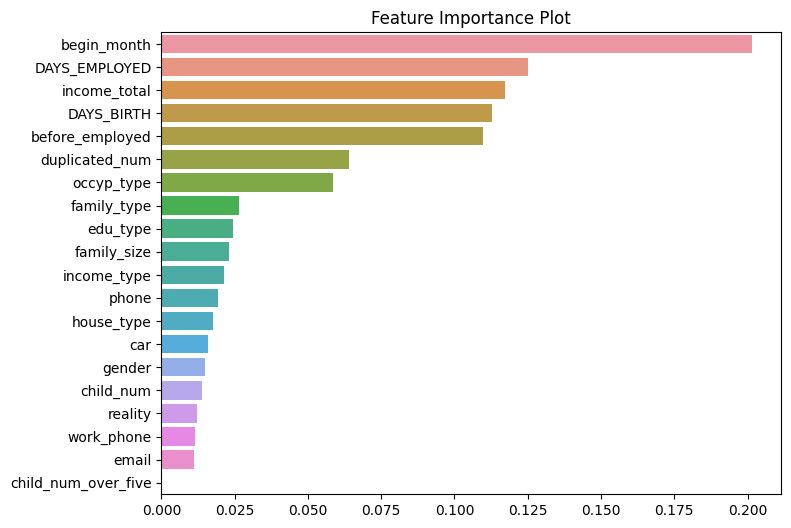

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(8,6))
plt.title('Feature Importance Plot')
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.show()


가장 중요하게 고려한 피쳐는 `begin_month`네요.<br>

`log_loss()`의 평가 지표로 손실을 수치화시켜 보겠습니다!<br>
log_loss는 로그 손실로 0에 가까울수록 좋은 지표입니다!<br>
실제 클래스를 낮은 확률로 예측할수록 큰 페널티를 주는 평가 지표입니다.<br>

log_loss를 위해서는 예측 확률을 계산해야 합니다.<br>
`predict_proba()` 메서드는 예측 확률을 계산할 수 있게 해줍니다!

In [ ]:
prob_1 = dt.predict_proba(X_valid)

log_loss_1 = log_loss(y_valid, prob_1)
print("Log loss(로그 손실): ", round(log_loss_1, 4))

Log loss(로그 손실):  8.3661


결정트리에서는 8.3661의 값을 보이는군요.<br>
그럼 두번째 모델로 랜덤포레스트에 대해 알아보고, 비교해 보겠습니다!

### **2. 랜덤 포레스트(Random Forest)**

<font color=green>**랜덤 포레스트(Random Forest)**</font>는 머신 러닝에서 사용되는 강력한 앙상블(Ensemble) 학습 알고리즘 중 하나입니다.<br>
랜덤 포레스트는 여러 개의 의사결정 트리(Decision Tree)를 생성하고 이들을 조합하여 예측을 수행합니다.<br>
랜덤 포레스트는 배깅(Bagging) 알고리즘을 사용하는 대표적인 모델입니다.


<img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/50/f9/ICLH_Diagram_Batch_03_27-RandomForest.component.xl.ts=1682647992456.png/content/adobe-cms/kr/ko/topics/random-forest/jcr:content/root/table_of_contents/body/content_section_styled/content-section-body/simple_narrative0/image" width=800>

랜덤 포레스트는 **랜덤성(randomness)**에 의해 트리들이 서로 조금씩 다른 특성을 갖습니다.<br>
이후 기초 결정트리들을 부트스트랩 방식으로 추출하고, 트리의 과반수 투표 또는<br>
평균을 내는 방식으로 최종 모델을 결정합니다.

💡 랜덤 포레스트의 주요 특징은 다음과 같습니다.<br>

**과적합 줄임** : 부트스트랩 샘플링과 랜덤 특성 선택을 통해 모델의 과적합(Overfitting)을 줄이는 효과를 가져옵니다.<br>
**앙상블 효과**: 여러 개의 의사결정 트리를 조합하여 강력하고 안정적인 예측을 제공합니다.<br>
**특성 중요도 평가**: 각 트리에서 변수의 중요도를 평가하여 특성의 영향력을 평가할 수 있습니다.<br>
**다양한 데이터 타입 처리**: 범주형 변수와 연속형 변수를 함께 다룰 수 있습니다.<br>

랜덤 포레스트는 분류 및 회귀 문제에 널리 사용되며, 다양한 데이터에 대해 좋은 예측 성능을 보여주는 알고리즘 중 하나입니다.

**< 주요 파라미터 >** <br>

<div class="text_cell_render border-box-sizing rendered_html">
<table>
<thead><tr>
<th style="text-align:center">파라미터 명</th>
<th style="text-align:left">설명</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center"><strong>n_estimators</strong></td>
<td style="text-align:left">- 결정트리의 갯수를 지정<br> - Default = 10<br>- 무작정 트리 갯수를 늘리면 성능 좋아지는 것 대비 시간이 걸릴 수 있음</td>
</tr>
<tr>
<td style="text-align:center"><strong>min_samples_split</strong></td>
<td style="text-align:left">- 노드를 분할하기 위한 최소한의 샘플 데이터수 <br> → 과적합을 제어하는데 사용<br> - Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가</td>
</tr>
<tr>
<td style="text-align:center"><strong>min_samples_leaf</strong></td>
<td style="text-align:left">- 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수<br>- min_samples_split과 함께 과적합 제어 용도<br>- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요</td>
</tr>
<tr>
<td style="text-align:center"><strong>max_features</strong></td>
<td style="text-align:left">- 최적의 분할을 위해 고려할 최대 feature 개수<br>- Default = 'auto' (결정트리에서는 default가 none이었음)<br>- int형으로 지정 →피처 갯수 / float형으로 지정 →비중<br>- sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정<br>- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정</td>
</tr>
<tr>
<td style="text-align:center"><strong>max_depth</strong></td>
<td style="text-align:left">- 트리의 최대 깊이<br>- default = None<br> → 완벽하게 클래스 값이 결정될 때 까지 분할<br>또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할<br>- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요</td>
</tr>
<tr>
<td style="text-align:center"><strong>max_leaf_nodes</strong></td>
<td style="text-align:left">리프노드의 최대 개수</td>
</tr>
</tbody>
</table>

</div>

주요 파라미터를 간단하게 알아보았습니다.<br>
그럼 이제 코드 실습을 통해서 모델 생성 부터 학습, 예측결과까지 해보면서
실제 성능을 보도록 하겠습니다!

**RandomForestClassifier**로 모델생성 후 `fit()` 메서드로 학습,<br>
`predict()` 메서드로 X_valid 데이터에 대한 예측값을 pred_2에 저장하고<br>
평균 정확도와 오차 행렬을 보도록 하겠습니다!

🔍️ **Inst.**<br>

✔️ `RandomForestClassifier` 객체를 로드하고, train 데이터를 학습시켜보세요!<br>
✔️ `pred_2` 변수에 `predict()` 메서드로 예측 결과를 저장해보세요!<br>
✔️ 마지막으로 평균 정확도와 오차 행렬을 출력해보세요!

In [ ]:
# RandomForestClassifier 객체를 로드하고, train 데이터를 학습시킵니다
# pred_2 변수에 `predict()` 메서드로 예측 결과를 저장합니다
# 평균 정확도와 오차 행렬을 출력합니다


💡 **Hint.**<br>
sklearn 패키지의 ensemble 모듈에 `RandomForestClasifier` 객체를 불러와보세요.<br>
평균 정확도와 오차 행렬을 출력하는 함수는 각각 `accuracy_score()`, `confusion_matrix()`입니다.<br>

✅ **Solution.**<br>
정답은 아래와 같습니다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

# 모델 학습 및 예측
rf.fit(X_train, y_train)
pred_2 = rf.predict(X_valid)

# 정확도 평가
accuracy = accuracy_score(y_valid, pred_2)
print(f'RandomForestClassifier 정확도: {accuracy:.4f}')

# 오차 행렬
cm2 = confusion_matrix(y_valid, pred_2)
print(cm2)

RandomForestClassifier 정확도: 0.8154
[[ 272   95  277]
 [  29  817  408]
 [  51  117 3226]]


사이킷런에서 제공하는 함수와 클래스로 모델의 성능을 더 자세히 평가해 보도록 할게요!

In [ ]:
pred_2 = rf.predict(X_valid)
valid_cm_2 = confusion_matrix(y_valid,pred_2)
valid_acc_2 = accuracy_score(y_valid,pred_2)
valid_recall_2 = recall_score(y_valid,pred_2, average='weighted')
valid_precision_2 = precision_score(y_valid,pred_1, average='weighted')
valid_f1_2 = f1_score(y_valid,pred_2, average='weighted')

print("Confusion Matrix(혼동행렬): \n",valid_cm_2)
print('\n')
print("Accuracy(정확도): ", round(valid_acc_2*100, 2))
print("Recall(재현율): ", round(valid_recall_2*100, 2))
print("Precision(정밀도): ", round(valid_precision_2*100, 2))
print("F1 Score(정밀도,리콜의 조화평균): ", round(valid_f1_2, 4))

Confusion Matrix(혼동행렬): 
 [[ 272   95  277]
 [  29  817  408]
 [  51  117 3226]]


Accuracy(정확도):  81.54
Recall(재현율):  81.54
Precision(정밀도):  76.84
F1 Score(정밀도,리콜의 조화평균):  0.8025


In [ ]:
# 변수 중요도 계산

importances_values = pd.Series(rf.feature_importances_, index=X_valid.columns).sort_values(ascending=False)
fr_top20 = importances_values.head(20)
fr_top20

begin_month            0.207786
DAYS_BIRTH             0.116020
before_employed        0.115361
DAYS_EMPLOYED          0.096652
duplicated_num         0.095870
income_total           0.093134
occyp_type             0.055866
family_type            0.026590
family_size            0.022647
edu_type               0.021673
income_type            0.021251
phone                  0.018305
car                    0.017949
reality                0.017703
child_num              0.017245
gender                 0.016849
house_type             0.015079
work_phone             0.014286
email                  0.009712
child_num_over_five    0.000025
dtype: float64

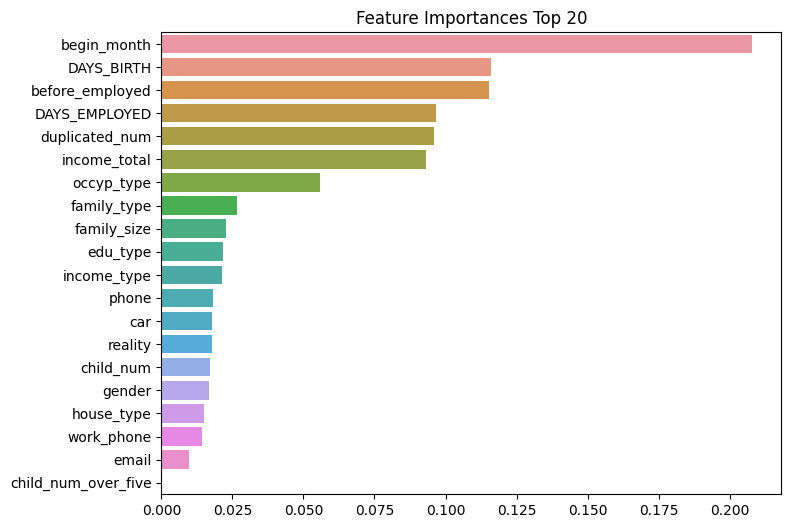

In [ ]:
# 변수 중요도 시각화

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=fr_top20, y=fr_top20.index)
plt.show()

랜덤 포레스트 모델도 `begin_month`를 가장 중요한 변수로 뽑았습니다!<br>
그렇다면 예측은 잘 했을까요? `log_loss`로 예측해볼게요!

In [ ]:
y_prob = rf.predict_proba(X_valid)
log_loss_2 = log_loss(y_valid, y_prob)
print("Log Loss: ", round(log_loss_2, 4))

Log Loss:  0.4966


WoW! 랜덤포레스트 모델에서 loss가 크게 줄어든 것을 볼 수 있습니다!<br>

그렇다면 또 다른 모델로 학습과 로스율을 보도록 하겠습니다~!<br>

또 다른 유명한 모델 중 하나인 **XGBoost**입니다!

### **3. XGBoost**

<font color=green>**XGBoost(Extreme Gradient Boosting)**</font>은 그래디언트 부스팅(Gradient Boosting) 알고리즘을<br>
분산환경에서도 실행할 수 있도록 구현해놓은 머신러닝 라이브러리입니다.<br>

그래디언트 부스팅은 Gradient와 Boosting을 합친 단어로,<br>
기울기를 줄여가며 결과적으로 잔차를 줄여나가는 학습 방식을 이야기합니다.<br>

약한 예측 모델(Weak Learner)들을 조합하여 강력한 예측 모델을 만드는 XGBoost는 이를 발전시킨 알고리즘입니다!

우선 XGBoost 모델을 사용하기 위해서는 패키지를 설치해주어야 합니다!

In [ ]:
!pip install xgboost

이제 `XGBClassifier()`로 모델을 생성한 뒤, 이전과 마찬가지로 학습 후 평가를 진행해주도록 하겠습니다.<br>
같은 방식으로 평균 정확도와 오차 행렬을 출력해볼게요!🔥


🔍️ **Inst.**<br>

✔️ `XGBClassifier` 객체를 로드하고, train 데이터를 학습시켜보세요!<br>
✔️ 모델의 일관성을 위해 `random_state=42`로 설정해주세요.<br>
✔️ `pred_3` 변수에 `predict()` 메서드로 예측 결과를 저장해보세요!<br>
✔️ 마지막으로 평균 정확도와 오차 행렬을 출력해보세요!

In [ ]:
# XGBClassifier 객체를 로드하고, train 데이터를 학습시킵니다
# 모델의 일관성을 위해 random_state=42로 설정해주세요
# pred_3 변수에 predict() 메서드로 예측 결과를 저장합니다
# 평균 정확도와 오차 행렬을 출력합니다


✅ **Solution.**<br>
정답은 아래와 같습니다.

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)

# 모델 학습 및 예측
xgb.fit(X_train, y_train)
pred_3 = xgb.predict(X_valid)

# 정확도 평가
accuracy = accuracy_score(y_valid, pred_3)
print(f'XGBoost 정확도: {accuracy:.4f}')

# 오차 행렬
cm3 = confusion_matrix(y_valid, pred_3)
print(cm3)

XGBoost 정확도: 0.7232
[[  90   79  475]
 [  18  444  792]
 [  35   66 3293]]


정확도는 0.72 가 나왔네요!
그렇다면 다양한 성능지표로 모델의 예측성능도 평가해 보겠습니다.

In [ ]:
pred_3 = xgb.predict(X_valid)
valid_cm_3 = confusion_matrix(y_valid, pred_3)
valid_acc_3 = accuracy_score(y_valid, pred_3)
valid_recall_3 = recall_score(y_valid, pred_3, average='weighted')
valid_precision_3 = precision_score(y_valid, pred_3, average='weighted')
valid_f1_3 = f1_score(y_valid, pred_3, average='weighted')

print("Confusion Matrix(혼동행렬): \n",valid_cm_3)
print("\n")
print("Accuracy(정확도): ", round(valid_acc_3*100, 2))
print("Recall(재현율): ", round(valid_recall_3*100, 2))
print("Precision(정밀도): ", round(valid_precision_3*100, 2))
print("F1 Score(정밀도,재현율의 조화평균): ", round(valid_f1_3, 4))

Confusion Matrix(혼동행렬): 
 [[  90   79  475]
 [  18  444  792]
 [  35   66 3293]]


Accuracy(정확도):  72.32
Recall(재현율):  72.32
Precision(정밀도):  71.84
F1 Score(정밀도,재현율의 조화평균):  0.673


이번에는 변수 중요도를 살펴볼게요!

In [ ]:
xgb_importances_values = xgb.feature_importances_
xgb_importances_values

array([0.03532011, 0.04608109, 0.04276669, 0.04204773, 0.04579745,
       0.04139627, 0.04715922, 0.05050854, 0.05041166, 0.05169708,
       0.05418397, 0.05758152, 0.05462679, 0.04661645, 0.04812541,
       0.0386807 , 0.12717871, 0.        , 0.06772235, 0.05209821,
       0.        ], dtype=float32)

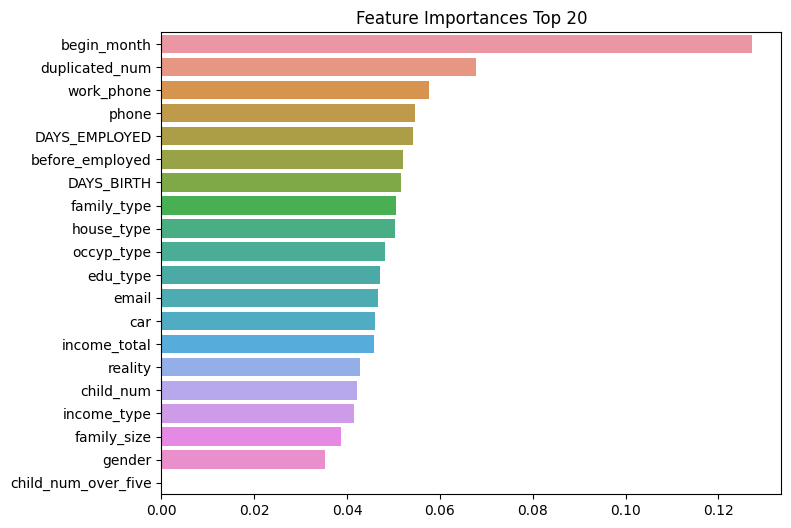

In [ ]:
# 변수 중요도 시각화

xgb_importances = pd.Series(xgb_importances_values, index=X_valid.columns).sort_values(ascending=False)
xgb_top20 = xgb_importances.head(20)

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=xgb_top20, y=xgb_top20.index)
plt.show()


XGBoost 모델에서도 가장 중요한 변수로 `begin_month`를 뽑았네요!<br>
`log_loss`를 계산해서 수치화시켜 보겠습니다.

In [ ]:
# log_loss를 계산합니다

y_prob = xgb.predict_proba(X_valid)
log_loss_3 = log_loss(y_valid, y_prob)
print("Log Loss: ", round(log_loss_3, 4))

Log Loss:  0.6441


랜덤 포레스트에 비해 loss는 약간 더 높게 나왔습니다!<BR>
그렇다면 마지막 모델로 LightGBM 모델을 사용해 보도록 하겠습니다.

### **4. LightGBM**

LightGBM에서 gbm 은 Gradient Boosting Model 로 , Tree를 기반으로 하는 학습 알고리즘입니다.<br>
이 모델 또한 가중치를 더하면서 진행하는 방법이기 때문에 XGBoost와 비슷합니다.

LightGBM의 차이점은 다른 알고리즘들과 다르게 Leaf-wise 분할을 한다는 점입니다!<br>
Leaf-wise 분할은 Level-wise 분할과 다르게 수직적으로 뻗어나간다는 차이점이 있습니다.<br>


<img src="https://www.researchgate.net/publication/343566690/figure/fig2/AS:932532258369537@1599344424444/Comparison-between-XGBoost-level-wise-horizontal-tree-growth-and-LightGBM-vertical.png">

트리의 균형을 맞추지 않고 최대 손실 값을 갖는 리프 노드를 지속적으로 분할하면서 깊고 비대칭적인 트리를 생성하고,<br>
기존의 트리 기준 분할 방식에 비해 예측 오류 손실을 최소화하여 예측 성능을 높일 수 있습니다.<br>
다만, 데이터가 적을 경우 과적합의 위험이 있습니다.

아래는 LightGBM의 주요 파라미터들을 설명한 표입니다!

**< LightGBM 파라미터 >**

<table style="border-collapse: collapse; width: 100%;" border="1" data-ke-align="alignLeft" data-ke-style="style12">
<tbody>
<tr>
<td style="width: 25.6589%; text-align: center;">파라미터</td>
<td style="width: 14.7286%; text-align: center;">default</td>
<td style="width: 59.6124%; text-align: center;">설명</td>
</tr>
<tr>
<td style="width: 25.6589%;">num_iterations</td>
<td style="width: 14.7286%; text-align: center;">100</td>
<td style="width: 59.6124%;">반복 수행하려는 트리의 개수 (너무 크면 오버피팅 발생)</td>
</tr>
<tr>
<td style="width: 25.6589%;">objective</td>
<td style="width: 14.7286%; text-align: center;">regression</td>
<td style="width: 59.6124%;">수치예측이면 regression, 이진분류이면 binary</td>
</tr>
<tr>
<td style="width: 25.6589%;">learning_rate</td>
<td style="width: 14.7286%; text-align: center;">0.1</td>
<td style="width: 59.6124%;">부스팅 스탭 반복할 때 학습률, 0~1 사이의 값</td>
</tr>
<tr>
<td style="width: 25.6589%;">max_depth</td>
<td style="width: 14.7286%; text-align: center;">1</td>
<td style="width: 59.6124%;">트리의 깊이</td>
</tr>
<tr>
<td style="width: 25.6589%;">min_data_in_leaf</td>
<td style="width: 14.7286%; text-align: center;">20</td>
<td style="width: 59.6124%;">한 리프의 최소 데이터 수<br>(decision tree의 min_sample_leaf와 동일, 오버피팅 제어)</td>
</tr>
<tr>
<td style="width: 25.6589%;">num_leaves</td>
<td style="width: 14.7286%; text-align: center;">31</td>
<td style="width: 59.6124%;">하나의 트리가 가질 수 있는 최대 리프 개수</td>
</tr>
<tr>
<td style="width: 25.6589%;">boosting</td>
<td style="width: 14.7286%; text-align: center;">gbdt</td>
<td style="width: 59.6124%;">부스팅 방법 (gbdt: Gradient Boosting DecisionTree / rf: RandomForest)</td>
</tr>
<tr>
<td style="width: 25.6589%;">bagging_fraction</td>
<td style="width: 14.7286%; text-align: center;">1.0</td>
<td style="width: 59.6124%;">데이터 샘플링 비율, 오버피팅 제어</td>
</tr>
<tr>
<td style="width: 25.6589%;">feature_fraction</td>
<td style="width: 14.7286%; text-align: center;">1.0</td>
<td style="width: 59.6124%;">개별 트리 학습 시 무작위로 선택하는 feature의 비율</td>
</tr>
<tr>
<td style="width: 25.6589%;">lambda_l1</td>
<td style="width: 14.7286%; text-align: center;">0.0</td>
<td style="width: 59.6124%;">L1 regulation 제어</td>
</tr>
<tr>
<td style="width: 25.6589%;">lambda_l2</td>
<td style="width: 14.7286%; text-align: center;">0.0</td>
<td style="width: 59.6124%;">L2 regulation 제어</td>
</tr>
<tr>
<td style="width: 25.6589%;">metric</td>
<td style="width: 14.7286%; text-align: center;">""</td>
<td style="width: 59.6124%;">성능평가를 어떤 것으로 할 것인지 (auc, l1, l2 등)</td>
</tr>
</tbody>
</table>

num_leaves: 클수록 정확도는 높아지지만 오버피팅 발생 가능

min_data_in_leaf: 클수록 오버피팅 방지

max_depth: 위 두개 파라미터와 결합하여 오버피팅 방지

objective: 사용하는 데이터셋의 타겟팅 값의 형태에 따라 조정 필요

metric: 성능 평가를 어떤 것으로 할 것인지 조정 필요

LightGBM도 XGBoost와 마찬가지로 패키지를 설치해주어야 합니다.

In [ ]:
!pip install lightgbm

이제 `LGBMClassifier()`로 모델을 생성한 뒤, 이전과 마찬가지로 학습 후 평가를 진행해주도록 하겠습니다.<br>
같은 방식으로 평균 정확도와 오차 행렬을 출력해볼게요!🔥


🔍️ **Inst.**<br>

✔️ `LGBMClassifier` 객체를 로드하고, train 데이터를 학습시켜보세요!<br>
✔️ 모델의 일관성을 위해 `random_state=42`로 설정해주세요.<br>
✔️ `pred_4` 변수에 `predict()` 메서드로 예측 결과를 저장해보세요!<br>
✔️ 마지막으로 평균 정확도와 오차 행렬을 출력해보세요!

In [ ]:
# LGBMClassifier 객체를 로드하고, train 데이터를 학습시킵니다
# 모델의 일관성을 위해 `random_state=42`로 설정해주세요
# pred_4 변수에 predict() 메서드로 예측 결과를 저장합니다
# 평균 정확도와 오차 행렬을 출력합니다


✅ **Solution.**<br>
정답은 아래와 같습니다.

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)

# 모델 학습 및 예측
lgbm.fit(X_train, y_train)
pred_4 = lgbm.predict(X_valid)

# 정확도 평가
accuracy = accuracy_score(y_valid, pred_4)
print(f'LGBM 정확도: {accuracy:.4f}')

# 오차 행렬
cm4 = confusion_matrix(y_valid, pred_4)
print(cm4)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1094
[LightGBM] [Info] Number of data points in the train set: 21165, number of used features: 19
[LightGBM] [Info] Start training from score -2.105335
[LightGBM] [Info] Start training from score -1.440314
[LightGBM] [Info] Start training from score -0.444193
LGBM 정확도: 0.7203
[[  63   76  505]
 [   3  383  868]
 [   5   23 3366]]


평균정확도가 0.72가 나왔네요!<br>
그렇다면 LightGBM 모델도 성능지표로 모델의 예측성능을 평가해 보도록 할게요!😀

In [ ]:
pred_4 = lgbm.predict(X_valid)
valid_cm_4 = confusion_matrix(y_valid, pred_4)
valid_acc_4 = accuracy_score(y_valid, pred_4)
valid_recall_4 = recall_score(y_valid, pred_4, average='weighted')
valid_precision_4 = precision_score(y_valid, pred_4, average='weighted')
valid_f1_4 = f1_score(y_valid, pred_4, average='weighted')

print("Confusion Matrix(혼동행렬): \n", valid_cm_4)
print('\n')
print("Accuracy(정확도): ", round(valid_acc_4*100, 2))
print("Recall(재현율): ", round(valid_recall_4*100, 2))
print("Precision(정밀도): ", round(valid_precision_4*100, 2))
print("F1 Score(정밀도, 리콜의 조화평균): ", round(valid_f1_4, 4))

Confusion Matrix(혼동행렬): 
 [[  63   76  505]
 [   3  383  868]
 [   5   23 3366]]


Accuracy(정확도):  72.03
Recall(재현율):  72.03
Precision(정밀도):  75.18
F1 Score(정밀도, 리콜의 조화평균):  0.6569


변수중요도를 통해 예측에 사용된 변수들 중 타깃변수에 가장 많은 영향을 준 변수가 무엇인지 살펴볼게요!

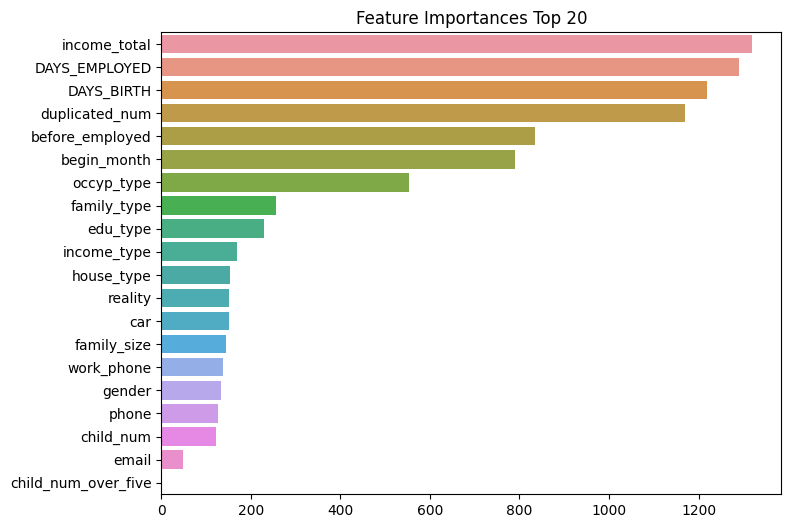

In [ ]:
light_importaces_values = lgbm.feature_importances_
light_importaces = pd.Series(light_importaces_values, index=X_valid.columns).sort_values(ascending=False)
light_top20 = light_importaces.head(20)

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=light_top20, y=light_top20.index)
plt.show()


LightGBM 모델에서는 가장 중요한 변수를 `income_total`로 보았네요!<br>
XGBoost와 유사한 알고리즘을 사용하는 모델이지만 다른 결과를 보이니 흥미롭네요!

`log_loss`까지 마지막으로 출력해보겠습니다!

In [ ]:
# log_loss를 계산합니다

y_prob = lgbm.predict_proba(X_valid)
log_loss_4 = log_loss(y_valid, y_prob)
print("Log Loss: ", round(log_loss_4, 4))

Log Loss:  0.6669


### **5. 모델 성능 비교하기**

😎 짜란~ 4가지 모델의 기초 모델링 및 학습이 완료되었습니다! <br>
지금까지 총 4가지의 모델로 앙상블학습을 해보았는데,<br>
이제 이 모든 모델들을 종합해서 평가해봐야겠죠?<br>

모델별 f1_score, log_loss를 비교해서 가장 성능이 좋은 모델을 골라보겠습니다!

In [ ]:
# f1_score를 비교합니다

print(f'의사결정나무\t{round(valid_f1_1, 4)}')
print(f'랜덤포레스트\t{round(valid_f1_2, 4)}')
print(f'XGBoost\t\t{round(valid_f1_3, 4)}')
print(f'LightGBM\t{round(valid_f1_4, 4)}')

의사결정나무	0.7672
랜덤포레스트	0.8025
XGBoost		0.673
LightGBM	0.6569


f1_score로 평가한 결과, 랜덤포레스트가 0.8025로 가장 높네요!<br>
그렇다면 이제 log_loss 를 통해 성능을 비교해 보겠습니다.<br>

In [ ]:
# log_loss를 비교합니다

print(f'의사결정나무\t{round(log_loss_1, 4)}')
print(f'랜덤포레스트\t{round(log_loss_2, 4)}')
print(f'XGBoost\t\t{round(log_loss_3, 4)}')
print(f'LightGBM\t{round(log_loss_4, 4)}')

의사결정나무	8.3661
랜덤포레스트	0.4966
XGBoost		0.6441
LightGBM	0.6669


log_loss는 손실이기 때문에 0에 가까울수록 더 좋은 지표입니다.<br>
여기에서는 랜덤포레스트가 log_loss가 가장 낮은 좋은 모델이라고 판단되네요!<br>

그럼 최종적으로 **하이퍼파라미터 튜닝**을 시작해 보도록 하겠습니다!<br>
렛츠 기릿!🌊

## **Step 2. Hyperparameter Tuning**

하이퍼파라미터는 머신러닝 모델의 동작 및 학습 과정을 제어하는 매개변수입니다.

예를 들어, 아래의 `RandomForestClassifier` 객체에서 아래와 같은 파라미터를 말합니다.

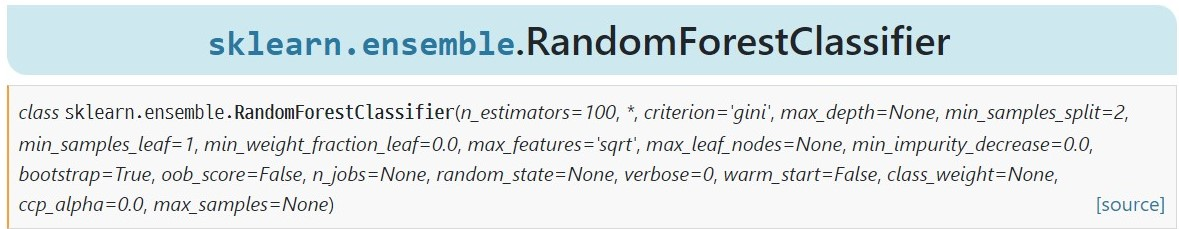

    n_estimators: `RandomForestClassifier`의 base tree 모델의 개수를 나타냅니다. 사용자가 원하는 값으로 바꿔줄 수 있습니다.

**하이퍼파라미터 튜닝**이란 모델을 최적화하기 위해 하이퍼파라미터를 조정하는 과정을 말합니다!

🙋 하이퍼파라미터 튜닝을 왜 해야할까요?

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_ensemble_oob_001.png">

위의 그래프는 모두 랜덤 포레스트이지만, `max_features` 하이퍼파라미터를 다르게 설정하여<br>
에러율이 차이가 많이 나는 것을 볼 수 있습니다.<br>

모두 같은 모델을 사용했지만 하이퍼파라미터 값의 변경에 따라 예측에 큰 영향을 미치죠!<br>

그럼 이제 하이퍼파라미터 튜닝을 하는 몇 가지 방법에 대해 알아보겠습니다!

일반적으로 하이퍼파라미터 튜닝을 하는 방법은 **Grid Search**와 **Random Search**가 있습니다.<br>

- Grid Search : 그리드 서치는 각 매개변수의 후보를 정하고 이들 **조합**을 모두 계산하는 방법입니다.<br>
탐색할 매개변수의 후보를 파악하기는 쉽지만, 조합에는 어디까지나 한계가 있기<br> 때문에 후보 수를 많이 지정하기는 어렵습니다.<br>

- Random Search : 랜덤 서치는 각 매개변수의 후보를 정하고 매개변수별로 **랜덤하게 선택**한 조합을 만듭니다.<br>
그리고 계산 과정에서 설정한 횟수만큼 반복하는 방법입니다.<br>
매개변수의 후보로 분포를 지정할 수 있고, 어떤 매개변수에 대해 일정 범위의 균등분포에서 선택할 수 있습니다.<br>

<img src="https://attachments.datarian.io/production-34c9ae01-2240-442f-83f2-974f06b97742-BDYKnmjJvHu5Neg7tlUrzDkroj7FzEUoCJkLXgD0TFY.png" width=800>

⚠️ **하이퍼파라미터 튜닝은 많은 모델을 테스트해보기 때문에 시간이 오래 걸리는
  작업입니다.**<br>
  따라서 적절하게 Search 횟수를 정해주는 것 또한 중요합니다.

일반적으로 그리드 서치보다 랜덤 서치의 효율이 더 높습니다.<br>

그 밖에도 아래와 같이 다양한 하이퍼파라미터 튜닝 방법들이 있습니다.<br>

- Bayesian Optimization
- Non-Probabilistic
- Evolutionary Optimization
- Gradient-based Optimization
- Early Stopping

### **1. GridSearch**

첫 번째로 Grid Search를 같이 진행해보겠습니다!<br>
sklearn 패키지에서는 model_selection 모듈에서 `GridSearchCV` 객체를 지원합니다!<br>
Grid Search를 할 때, 교차 검증(Cross Validation)으로 학습 및 평가할 수 있습니다.

`GridSearchCV`는 다음과 같이 하이퍼파라미터를 딕셔너리의 형태로 전달해주어야 합니다.

모델은 가장 효율이 좋았던 `RandomForestClassifier()`로 해주도록 하겠습니다!

In [ ]:
# GridSearchCV 객체를 불러옵니다
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터를 딕셔너리로 설정합니다

params_grid = {
    'n_estimators' : [100, 300, 1000],
    'max_features' : ['sqrt','log2'],
    'max_depth' : [3, 5, 10],
    'criterion' : ['gini','entropy'],
    'min_samples_split' : [2, 5, 20]
}

`cv=3`으로 설정해줘서 3개의 교차검증 셋만 만들어주도록 하겠습니다.

`GridSearchCV`의 주요 파라미터는 다음과 같습니다.

<div class="text_cell_render border-box-sizing rendered_html">
<table>
<thead><tr>
<th style="text-align:center">파라미터 명</th>
<th style="text-align:left">설명</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center"><strong>estimator</strong></td>
<td style="text-align:left">- sklearn의 모델 객체<br></td>
</tr>
<tr>
<td style="text-align:center"><strong>param_grid</strong></td>
<td style="text-align:left">- 파라미터 이름을 key로, 파라미터 값을 value로 갖는 딕셔너리<br>- 값은 하나의 값이나 리스트로 주어질 수 있음<br></td>
</tr>
<tr>
<td style="text-align:center"><strong>scoring</strong></td>
<td style="text-align:left">- 모델을 테스트하기 위한 평가 전략<br></td>
</tr>
<tr>
<td style="text-align:center"><strong>n_jobs</strong></td>
<td style="text-align:left">- 병렬 처리하는 CPU 수<br>- -1로 설정하면 모든 코어를 활용해서 학습<br>- default = None(1)</td>
</tr>
<tr>
<td style="text-align:center"><strong>cv</strong></td>
<td style="text-align:left">- cross validation 수<br>- default = None(5)<br></td>
</tr>
<tr>
<td style="text-align:center"><strong>verbose</strong></td>
<td style="text-align:left">- 설명 메시지를 숫자에 따라 조절<br>- 높은 숫자를 넣을수록 더 많은 메시지를 생성<br>- default = 0</td>
</tr>
</tbody>
</table>

</div>


`scoring="neg_log_loss"`로 log_loss로 평가하도록 하고, `n_jobs=-1`로<br>
가능한 모든 코어 자원을 사용하도록 하겠습니다.

In [ ]:
# param_grid 하이퍼 파라미터를 3개의 train, valid set fold 로 나누어 테스트 수행

grid_rf = GridSearchCV(rf, param_grid=params_grid, cv=3, verbose=2,
                       scoring="neg_log_loss", n_jobs=-1)

# params_grid 의 하이퍼 파라미터를 순차적으로 학습/평가
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 20, 50],
                         'n_estimators': [100, 300, 1000]},
             scoring='neg_log_loss', verbose=2)

Grid Search가 끝났습니다!<br>
어떤 파라미터 조합이 가장 좋은 파라미터로 뽑혔을까요?🤔<br>
가장 성능이 좋았던 예측기와, 최고 점수를 확인해봅시다!

`best_params_` 속성은 가장 성능이 높게 나온 예측기의 파라미터를 반환합니다.<br>
`best_score_` 속성은 가장 성능이 좋았을 때의 점수를 반환합니다.

In [ ]:
# 최고의 파라미터 조합과 최고의 점수를 출력합니다
grid_best_params = grid_rf.best_params_
grid_best_score = grid_rf.best_score_

print(f"Best params: {grid_best_params}")
print(f"Best score: {round(-grid_best_score, 4)}")

log_loss 값이 오히려 더 높아진 것 같습니다.

최고의 모델로 다시 한 번 학습시켜보도록 하겠습니다!

In [ ]:
rf_tune1 = grid_rf.best_estimator_

rf_tune1.fit(X_train, y_train)
y_prob1 = rf_tune1.predict_proba(X_valid)
round(log_loss(y_valid, y_prob1), 4)

0.7381

GridSearch 이후 log_loss가 더 높아졌습니다.<br>
다른 튜닝 방법을 적용해봐야겠어요~<br>
이번에는 RandomSearch 방식으로 하이퍼파라미터 튜닝을 해보도록 하겠습니다!

### **2. RandomSearch**

두 번째로 RandomSearch를 진행해볼게요~<br>
함께 GridSearch로 튜닝을 진행했을 때에는 좋은 성능을 내지 못했습니다.<br>
RandomSearch는 어떨까요? 확인해봅시다!<br>

RandomSearch는 가능한 조합들 중에 랜덤으로 선택해서 테스트를 진행합니다!<br>

GridSearch와 마찬가지로, sklearn의 model_selection 모듈에서 `RandomizedSearchCV` 객체를 지원합니다.<br>
역시 RandomSearch를 할 때, 교차검증(cross validation)이 가능합니다.

`RandomizedSearchCV`는 `GridSearchCV` 파라미터에 추가로 `n_iter` 파라미터를 가지고 있습니다.<br>
그리고 `params_grid` 파라미터의 변수 이름이 `params_distributions`로 바뀌었습니다.

<div class="text_cell_render border-box-sizing rendered_html">
<table>
<thead><tr>
<th style="text-align:center">파라미터 명</th>
<th style="text-align:left">설명</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center"><strong>n_iter</strong></td>
<td style="text-align:left">- 샘플링 될 파라미터 조합 수<br>- default = 10</td>
</tr>

`n_iter`의 값을 어떻게 설정하냐에 따라 실행 시간이 결정됩니다.

아래와 같이 테스트할 파라미터를 전달해주도록 하겠습니다.

In [ ]:
# RandomSearchCV 객체를 불러옵니다
from sklearn.model_selection import RandomizedSearchCV

# 하이퍼파라미터를 딕셔너리로 설정합니다

params_distrib = {
    'n_estimators' : [100, 300, 1000, 3000],
    'max_features' : ['sqrt','log2', 0.2, 0.5, 0.8],
    'max_depth' : np.arange(3, 20, 3),
    'criterion' : ['gini','entropy'],
    'min_samples_split' : [2, 5, 10, 20]
}

`n_iter=100`으로 조합 수는 100개로 한정해주도록 할게요.

In [ ]:
# param_distrib 하이퍼 파라미터를 3개의 train, valid set fold 로 나누어 테스트 수행

random_rf = RandomizedSearchCV(rf, param_distributions=params_distrib, cv=3, verbose=2,
                       scoring="neg_log_loss", n_jobs=-1, n_iter=100)

# params_distrib 의 하이퍼 파라미터를 순차적으로 학습/평가
random_rf.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: ignored

같은 방식으로 최고의 파라미터 조합과 최고의 점수를 각각 출력해볼게요!

In [ ]:
# 최고의 파라미터 조합과 최고의 점수를 출력합니다
random_best_params = random_rf.best_params_
random_best_score = random_rf.best_score_

print(f"Best params: {random_best_params}")
print(f"Best score: {round(-random_best_score, 4)}")

다시 한 번 학습시켜 최종적으로 비교해보도록 하겠습니다.

In [ ]:
rf_tune2 = grid_rf.best_estimator_

rf_tune2.fit(X_train, y_train)
y_prob2 = rf_tune2.predict_proba(X_valid)
round(log_loss(y_valid, y_prob2), 4)

### **3. HyperOpt**

GridSearch와 RandomSearch 이 외에도 자주 사용되는 파이썬 패키지들이 있습니다.<br>
대표적인 패키지로 HyperOpt, Optuna 등의 패키지가 있습니다.<br>
저희는 그 중 하나인 **HyperOpt**를 사용해서 하이퍼파라미터 튜닝을 해보도록 하겠습니다!

💡 **HyperOpt**<br>
HyperOpt는 베이지안 최적화 기법에 기반한 하이퍼파라미터 튜닝 패키지입니다.<br>
모든 가능한 조합을 시도하지 않고, 조금 더 빠르게 하이퍼파라미터 공간을 탐색하는 방법을 제공합니다.<br>

HyperOpt는 TPE(Tree-structured Parzen Estimator) 알고리즘을 사용해서 더 빠르게 최적화합니다.

HyperOpt를 사용하기 위해서 먼저 패키지를 설치해주겠습니다!

In [ ]:
# HyeprOpt 패키지를 설치합니다
!pip install hyperopt

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import cross_val_score

space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 12, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50])
    }

def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'],
                                   max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'],
                                 )
    log_loss = cross_val_score(model, X_train, y_train, scoring="neg_log_loss", cv=3)

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -log_loss, 'status': STATUS_OK }

trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 20,
            trials= trials)
best